# Exploratory Analysis

In this notebook, we will download the data and take a first look. Then we will split the data into training and verification sets for the model selection and tuning in the next notebook.

In [1]:
# downloading and importing the data
import os
import tarfile
import urllib

# data analysis libraries
import pandas as pd
import numpy as np

# graphing
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Getting the Data

In [2]:
# url hosting this data set
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# file path to where we will save the data
HOUSING_PATH = os.path.join("datasets","housing")

# function to download the compressed data set (.tgz) from the given url
# then unpack the .csv
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [3]:
# download the data set
fetch_housing_data()

In [4]:
# once we've downloaded and unpacked the data using the above fn, use
# pandas to read in the .csv as a pandas DataFrame
csv_path = os.path.join(HOUSING_PATH, "housing.csv")
HousingData = pd.read_csv(csv_path)

# Initial Exploration  
What attributes do we have? What do their distributions look like overall? Are there any anomalies we should look out for later?

In [5]:
# What does the data look like?
# show top 5 rows
HousingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


9 numerical attributes (of which 2 are values for coordinates)  
1 categorical attribute: ocean_proximity stores a string  
median_house_value will be our target when we develop a predictive model

In [6]:
# information on the amount of data (and null values)
HousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We have 20,640 data entries in this set.  
total_bedrooms appears to be the only attribute with some null values (about 200)

### Now lets look at the data for each of these attributes

In [7]:
# summary statistical information (works with the numerical data only)
HousingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# the data contains one categorical variable: ocean_proximity
# show the value counts for this column
HousingData["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

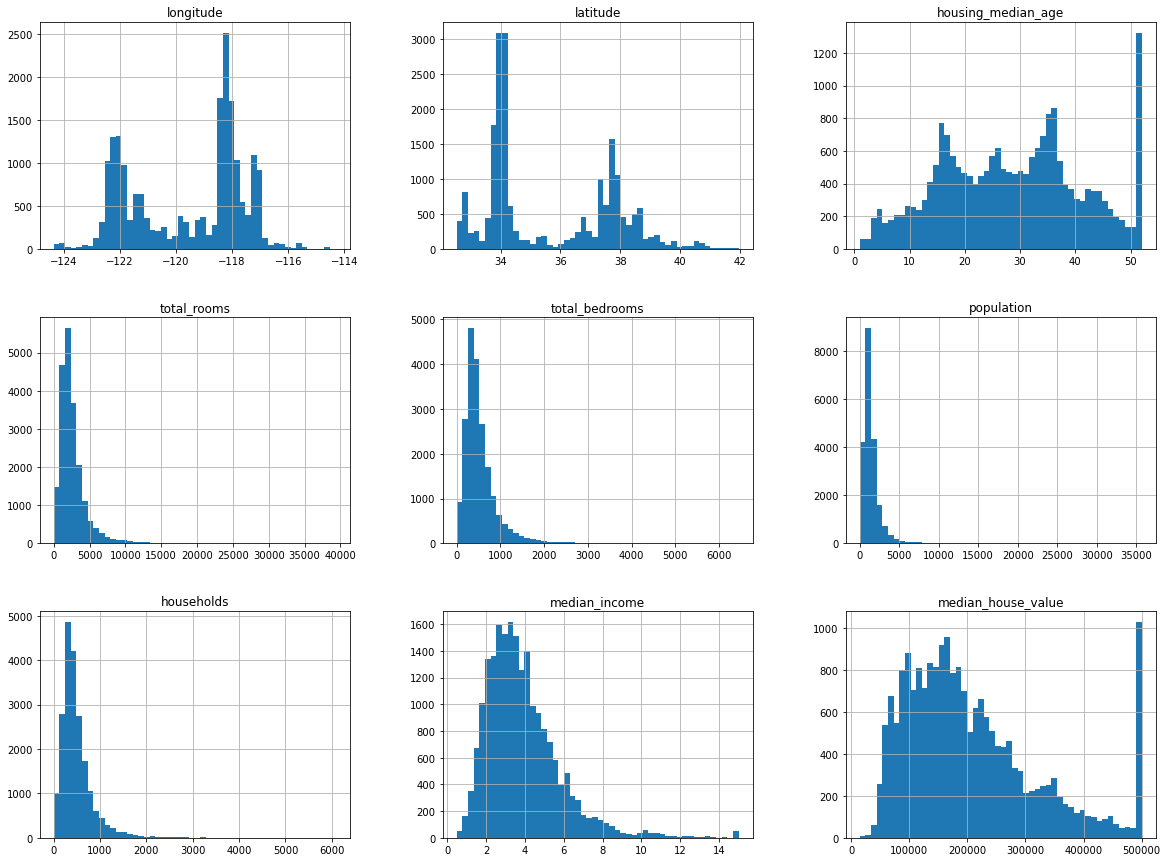

In [9]:
# For a graphical view of these columns, display histograms
HousingData.hist(bins=50,figsize=(20,15))

Notes on data collection and preprocessing:  
- Median income was scaled roughly in units of \$10,000, and then capped between 0.5 and 15
- house values and ages are also capped at some maximum value (we need to keep this in mind while testing predictions, because house values will be our target attribute)  
- These attributes are often tail heavy and are varied in scale. We will need to address this in our data processing pipeline, as ML models work better with symmetric and similarly scalled attributes

# Train-Test Split  
At this point, we need to split the data into training and test sets before further exploration. This is to avoid any source of data-snooping bias.  

We will use 80% of the data for the training set, and set aside 20% for testing
We predict median income to be an important feature, however the distribution has a long positive tail. For this reason, we will use a stratified train-test split based on median income. This should ensure that our training set is representative of the whole distribution of median incomes.

<AxesSubplot:>

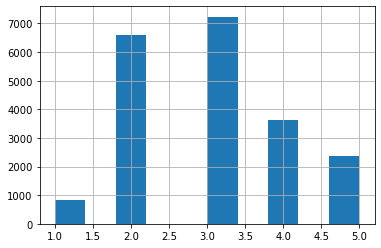

In [10]:
# create strata by adding category to the data
HousingData["income_cat"] = pd.cut(HousingData["median_income"],
                                  bins=[0,1.5,3.0,4.5,6,np.inf],
                                  labels=[1,2,3,4,5])

# show how the districts fall into these income strata
HousingData["income_cat"].hist()

In [11]:
# now split into two DataFrames using a sklearn function
from sklearn.model_selection import StratifiedShuffleSplit

# create a StratifiedShuffleSplit object with a defined randome state for reproducibility
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# use the split method to get the indices of data entries in our train and test sets
# then use those indices to get our train/test sets
for train_index, test_index in split.split(HousingData, HousingData["income_cat"]):
    strat_train_set = HousingData.loc[train_index]
    strat_test_set = HousingData.loc[test_index]
    
# now that the data is split, we can remove the income category
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [12]:
# save our training and validation sets
strat_train_set.to_pickle("StratifiedTrainingSet.pkl")
strat_test_set.to_pickle("StratifiedTestSet.pkl")

# Discover and Visualize the Data

In [13]:
# We will work with purely the training set to avoid data snooping bias
housing = strat_train_set.copy()

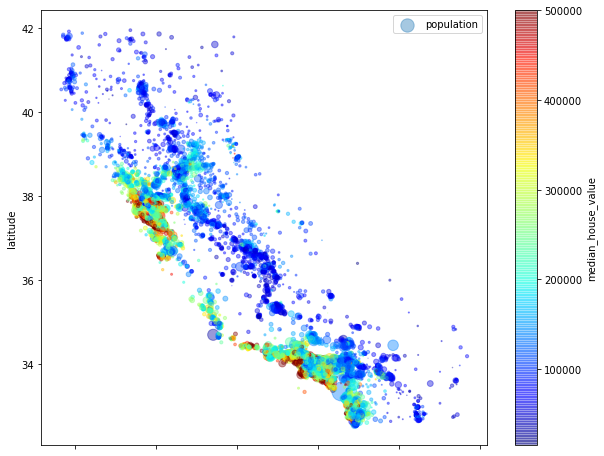

In [14]:
# geographical data
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,8),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [15]:
# looking for correlations between attributes and median housing price
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:>

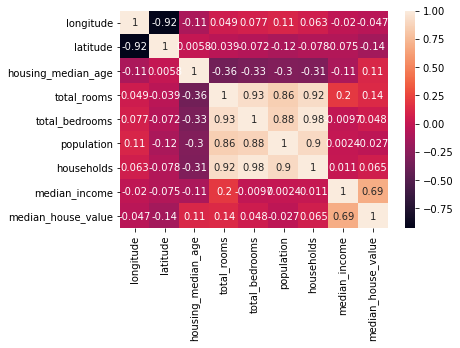

In [16]:
sns.heatmap(corr_matrix,annot=True)

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

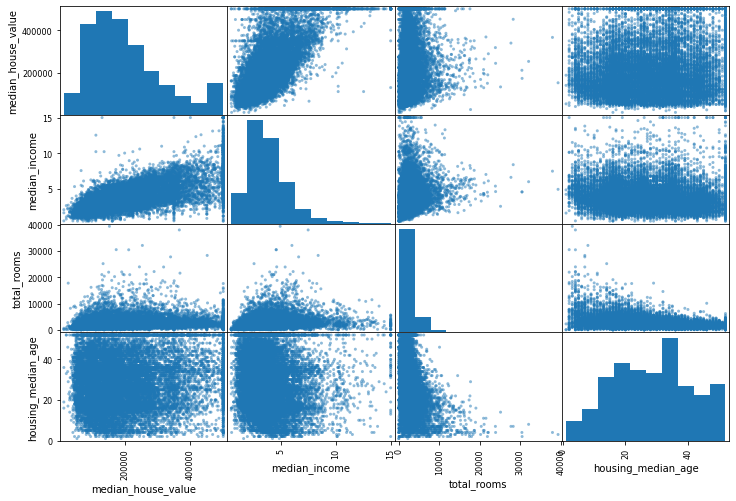

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

Median income has a significant correlation with the target and is clearly a good candidate for a feature in our model. The other numerical attributes, as they are, have little to no correlation to the target.  

There is clearly a relationship between coordinates and home values, which may yield interesting results from a clustering algorithm. However, in this project we will keep it simple, and focus on a regression model using the numerical, non-geographical attributes only.

# Creating New Attributes  
Some of our attributes clearly have little relation to the target (e.g. why would total number of rooms in a district contribute to home values? Especially when district are variable in total population and households). We will attempt to combine some attributes to make them relevant to the problem.

In [18]:
# rooms per household
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# bedrooms per room
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# population per household
housing["population_per_household"] = housing["population"]/housing["households"]

# check correlation matrix
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64